<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/wwa/blob/main/3_comparing_pso_and_chaotic_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the benchmark function
#def benchmark_function(x):
#    return x**2

def benchmark_function(x):
    return np.sin(x)+np.cos(0.5*x)+np.sin(2*x)+np.cos(3.5*x)

# Define the chaotic map function
def chaotic_map(x, a):
    return (4 * a * x * (1 - x))  # Logistic map equation


# Define the chaotic Tent map function
def chaotic_map(x, a):
    if x < 0.5:
        return a * x
    else:
        return a * (1 - x)

# Define the PSO algorithm
def pso(benchmark_func, num_particles, num_iterations, use_chaotic=False):
    # Initialize particles' positions and velocities
    positions = np.random.uniform(low=-10, high=10, size=(num_particles,))
    velocities = np.random.uniform(low=-1, high=1, size=(num_particles,))

    # Initialize global best position and corresponding value
    global_best_pos = positions[0]
    global_best_val = benchmark_func(global_best_pos)

    # Initialize lists to store best positions and values at each iteration
    best_positions = [global_best_pos]
    best_values = [global_best_val]

    # PSO main loop
    for _ in range(num_iterations):
        if use_chaotic:
            a = np.random.uniform(low=2.9, high=4.0)  # Chaotic map parameter

        for i in range(num_particles):
            if use_chaotic:
                # Update particle's velocity using chaotic map
                velocities[i] = velocities[i] + 2 * chaotic_map(best_positions[-1] - positions[i], a) \
                                + 2 * chaotic_map(global_best_pos - positions[i], a)
            else:
                # Update particle's velocity using regular PSO equation
                velocities[i] = velocities[i] + 2 * np.random.random() * (best_positions[-1] - positions[i]) \
                                + 2 * np.random.random() * (global_best_pos - positions[i])

            # Update particle's position
            positions[i] = positions[i] + velocities[i]

            # Update global best position and value
            particle_val = benchmark_func(positions[i])
            if particle_val < global_best_val:
                global_best_pos = positions[i]
                global_best_val = particle_val

        # Store best position and value at each iteration
        best_positions.append(global_best_pos)
        best_values.append(global_best_val)

    return best_positions, best_values

In [30]:
# Example usage
num_particles = 100
num_iterations = 5000

original_positions, original_values = pso(benchmark_function, num_particles, num_iterations)
chaotic_positions, chaotic_values = pso(benchmark_function, num_particles, num_iterations, use_chaotic=True)

<ipython-input-1-516e345db7e6>:9: RuntimeWarning: overflow encountered in double_scalars
  return np.sin(x)+np.cos(0.5*x)+np.sin(2*x)+np.cos(3.5*x)
<ipython-input-1-516e345db7e6>:9: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)+np.cos(0.5*x)+np.sin(2*x)+np.cos(3.5*x)
<ipython-input-1-516e345db7e6>:9: RuntimeWarning: invalid value encountered in cos
  return np.sin(x)+np.cos(0.5*x)+np.sin(2*x)+np.cos(3.5*x)
<ipython-input-1-516e345db7e6>:45: RuntimeWarning: overflow encountered in double_scalars
  velocities[i] = velocities[i] + 2 * chaotic_map(best_positions[-1] - positions[i], a) \
<ipython-input-1-516e345db7e6>:46: RuntimeWarning: overflow encountered in double_scalars
  + 2 * chaotic_map(global_best_pos - positions[i], a)
<ipython-input-1-516e345db7e6>:21: RuntimeWarning: overflow encountered in double_scalars
  return a * (1 - x)


In [31]:
# Print the best solutions for both algorithms
print("Original PSO Best Solutions:")
for i, pos in enumerate(original_positions):
    if i%num_iterations==0:
      print(f"Iteration {i+1}: {(pos)}==>{original_values[i]}")

best_index = np.argmax(original_values)
best_position = original_positions[best_index]
best_value = original_values[best_index]

print(f"\nBest Solution for PSO to maximize: Position(x) = {best_position}, Value(y) = {best_value}")

best_index = np.argmin(original_values)
best_position = original_positions[best_index]
best_value = original_values[best_index]

print(f"\nBest Solution for PSO to minimize: Position(x) = {best_position}, Value(y) = {best_value}")

print("\nChaotic PSO Best Solutions:")
for i, pos in enumerate(chaotic_positions):
  if i%num_iterations==0:
    print(f"Iteration {i+1}: {(pos)}")

best_index = np.argmax(chaotic_values)
best_position = chaotic_positions[best_index]
best_value = chaotic_values[best_index]

print(f"\nBest Solution for chaotic PSO to maximize: Position(x) = {best_position}, Value(y) = {best_value}")

best_index = np.argmin(chaotic_values)
best_position = chaotic_positions[best_index]
best_value = chaotic_values[best_index]

print(f"\nBest Solution for chaotic PSO to minimize: Position(x) = {best_position}, Value(y) = {best_value}")

Original PSO Best Solutions:
Iteration 1: 6.043831252041841==>-2.359699897820792
Iteration 5001: 5.431643883569568e+52==>-3.657808729234179

Best Solution for PSO to maximize: Position(x) = 6.043831252041841, Value(y) = -2.359699897820792

Best Solution for PSO to minimize: Position(x) = 5.431643883569568e+52, Value(y) = -3.657808729234179

Chaotic PSO Best Solutions:
Iteration 1: -4.199074020867348
Iteration 5001: -6.9341606890847415e+103

Best Solution for chaotic PSO to maximize: Position(x) = -4.199074020867348, Value(y) = -1.0197246943704694

Best Solution for chaotic PSO to minimize: Position(x) = -6.9341606890847415e+103, Value(y) = -3.656456789176724


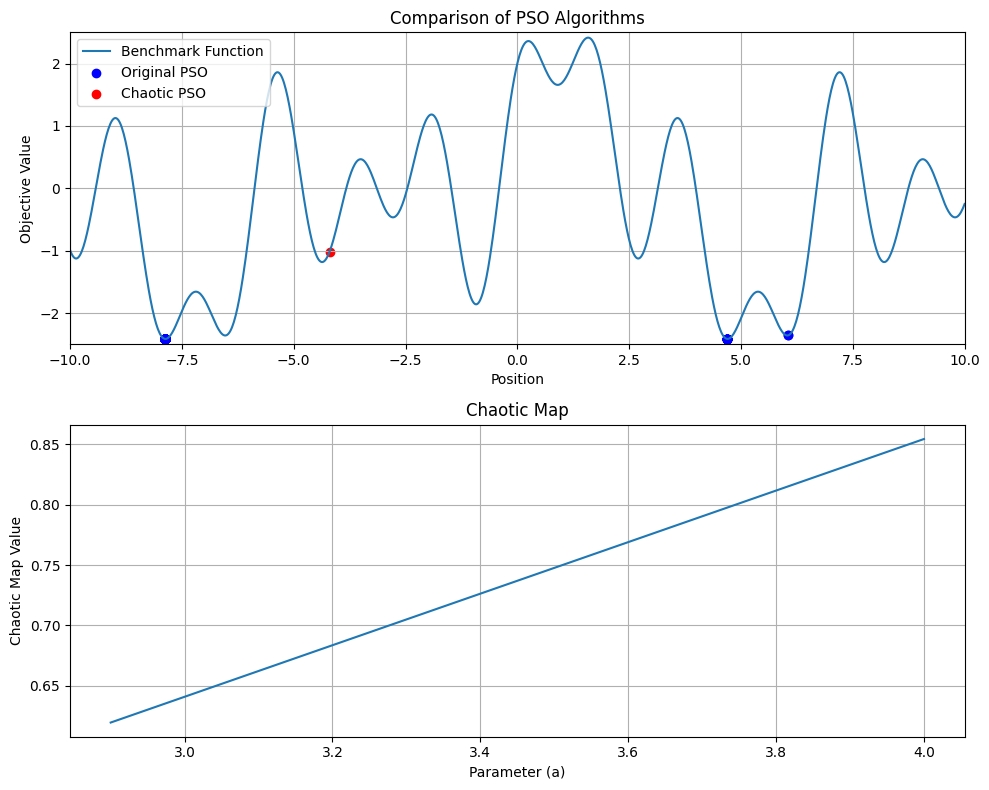

In [32]:
# Plotting the objective function and the chaotic map
x = np.linspace(-10, 10, 1000)
y_benchmark = benchmark_function(x)

plt.figure(figsize=(10, 8))

# Plot the objective function
plt.subplot(2, 1, 1)
plt.plot(x, y_benchmark, label="Benchmark Function")
plt.scatter(original_positions, original_values, c='b', label="Original PSO")
plt.scatter(chaotic_positions, chaotic_values, c='r', label="Chaotic PSO")
plt.xlabel("Position")
plt.ylabel("Objective Value")
plt.title("Comparison of PSO Algorithms")
plt.legend()
#plt.xticks(np.arange(min, max, max/10))
plt.xlim(-10, 10)
plt.ylim(-2.5, 2.5)
plt.grid(True)

# Plot the chaotic map
a_values = np.linspace(2.9, 4.0, 100)
x0 = np.random.uniform(low=0, high=1)
chaotic_values = [chaotic_map(x0, a) for a in a_values]

plt.subplot(2, 1, 2)
plt.plot(a_values, chaotic_values)
plt.xlabel("Parameter (a)")
plt.ylabel("Chaotic Map Value")
plt.title("Chaotic Map")
plt.grid(True)

#plt.xticks(np.arange(10, 100, 2))
#plt.yticks(np.arange(-4, 5, 1))
#plt.grid(True)

plt.tight_layout()
plt.show()